1. Can we use Bagging for regression problems ?
Yes, Bagging can be used for regression problems using models like BaggingRegressor.

2. What is the difference between multiple model training and single model training?
Single model training involves one algorithm, while multiple model training (ensemble) combines several models to improve performance and reduce variance or bias.


3. Explain the concept of feature randomness in Random Forest?
In Random Forest, each tree is trained on a random subset of features, introducing variability and reducing correlation among trees to enhance generalization.


4. What is OOB (Out-of-Bag) Score?
The OOB score is an internal validation score in Bagging/Random Forest using data not included in the bootstrap sample for training each estimator.


5. How can you measure the importance of features in a Random Forest model ?
Feature importance can be measured by the total reduction of the impurity (e.g., Gini or entropy) brought by that feature across all trees, or via permutation importance.


6. Explain the working principle of a Bagging Classifier?
A Bagging Classifier builds multiple models on different bootstrap samples and combines their predictions using majority voting (classification).


7. How do you evaluate a Bagging Classifier’s performance?
Use metrics like accuracy, precision, recall, F1-score, ROC-AUC on a test set or using OOB score as a validation proxy.


8. How does a Bagging Regressor work ?
It trains multiple regressors on bootstrapped datasets and averages their predictions to produce a final output.


9. What is the main advantage of ensemble techniques ?
They improve model accuracy, robustness, and generalization by combining the strengths of multiple models.


10. What is the main challenge of ensemble methods?
They can be computationally expensive, harder to interpret, and may risk overfitting if not properly tuned.


11. Explain the key idea behind ensemble techniques ?
Combine multiple models to achieve better predictive performance than any individual model alone.


12. What is a Random Forest Classifier?
It is an ensemble of decision trees using Bagging and random feature selection to classify data points.


13. What are the main types of ensemble techniques?
Bagging, Boosting, Stacking, and Voting.


14. What is ensemble learning in machine learning ?
It is a method where multiple models are trained and combined to solve the same problem for better results.


15. When should we avoid using ensemble methods ?
When interpretability is crucial or when a simpler model performs adequately with lower computational cost.


16. How does Bagging help in reducing overfitting ?
By averaging multiple models trained on random subsets, Bagging reduces variance and mitigates overfitting.


17. Why is Random Forest better than a single Decision Tree ?
It reduces overfitting and variance by combining predictions from many uncorrelated trees.


18. What is the role of bootstrap sampling in Bagging?
It ensures diversity by training each model on a different random sample with replacement from the dataset.


19. What are some real-world applications of ensemble techniques ?
Fraud detection, medical diagnosis, spam filtering, stock market prediction, and recommendation systems.


20. What is the difference between Bagging and Boosting?
Bagging builds models independently in parallel and focuses on reducing variance; Boosting builds models sequentially, each correcting errors of the previous, and focuses on reducing bias.



In [2]:
#1 Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load sample dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier()

# Initialize Bagging Classifier (use `estimator` instead of `base_estimator`)
bagging_clf = BaggingClassifier(estimator=base_estimator,
                                n_estimators=50,
                                random_state=42)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier Accuracy: {accuracy:.2f}")


Bagging Classifier Accuracy: 1.00


In [3]:
#2 Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load a regression dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base estimator (Decision Tree Regressor)
base_estimator = DecisionTreeRegressor()

# Initialize Bagging Regressor
bagging_reg = BaggingRegressor(estimator=base_estimator,
                                n_estimators=50,
                                random_state=42)

# Train the model
bagging_reg.fit(X_train, y_train)

# Predict on test data
y_pred = bagging_reg.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Bagging Regressor Mean Squared Error: {mse:.2f}")


Bagging Regressor Mean Squared Error: 0.26


In [4]:
#3 Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importance Scores (Top to Bottom):\n")
print(feature_importance_df)


Feature Importance Scores (Top to Bottom):

                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    0.005

In [5]:
#4 Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
tree_regressor = DecisionTreeRegressor(random_state=42)
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
tree_regressor.fit(X_train, y_train)
forest_regressor.fit(X_train, y_train)

# Predict on test set
y_pred_tree = tree_regressor.predict(X_test)
y_pred_forest = forest_regressor.predict(X_test)

# Evaluate using Mean Squared Error
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_forest = mean_squared_error(y_test, y_pred_forest)

# Print results
print(f"Decision Tree Regressor MSE: {mse_tree:.2f}")
print(f"Random Forest Regressor MSE: {mse_forest:.2f}")


Decision Tree Regressor MSE: 0.53
Random Forest Regressor MSE: 0.26


In [6]:
#5 Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and testing sets (optional, OOB is evaluated on training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest with OOB enabled
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, bootstrap=True, random_state=42)
rf_clf.fit(X_train, y_train)

# Print the Out-of-Bag score
print(f"OOB Score: {rf_clf.oob_score_:.2f}")


OOB Score: 0.95


In [7]:
#6 Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimator (SVM with RBF kernel)
svm_base = SVC(probability=True)  # probability=True is required if using soft voting later

# Create Bagging Classifier with SVM as base estimator
bagging_clf = BaggingClassifier(estimator=svm_base, n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging Classifier with SVM Accuracy: {accuracy:.2f}")


Bagging Classifier with SVM Accuracy: 1.00


n_estimators=1 → Accuracy: 0.9474
n_estimators=10 → Accuracy: 0.9649
n_estimators=50 → Accuracy: 0.9708
n_estimators=100 → Accuracy: 0.9708
n_estimators=200 → Accuracy: 0.9708
n_estimators=300 → Accuracy: 0.9708


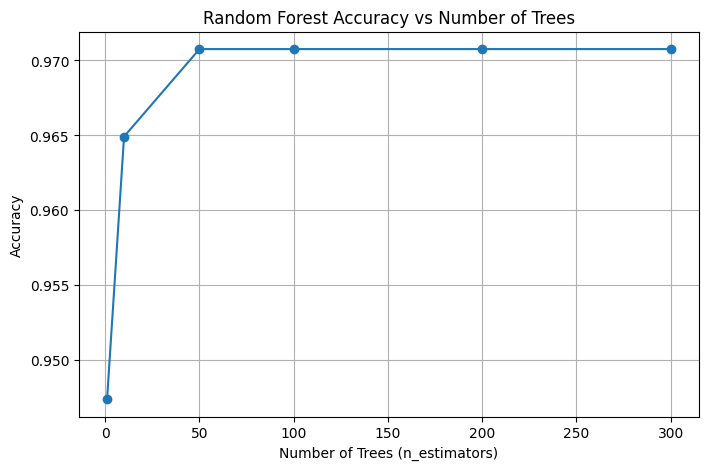

In [8]:
#7 Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define list of n_estimators to test
n_estimators_list = [1, 10, 50, 100, 200, 300]
accuracies = []

# Train and evaluate Random Forest for each n_estimators
for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators={n} → Accuracy: {acc:.4f}")

# Plotting accuracy vs. number of trees
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='-')
plt.title("Random Forest Accuracy vs Number of Trees")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [9]:
#8 Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimator: Logistic Regression
base_estimator = LogisticRegression(max_iter=1000)

# Create Bagging Classifier
bagging_clf = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict probabilities on test set
y_prob = bagging_clf.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)
print(f"Bagging Classifier with Logistic Regression - AUC Score: {auc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Bagging Classifier with Logistic Regression - AUC Score: 0.9982


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


R² Score: 0.8051
RMSE: 0.5053

Top Features:
     Feature  Importance
0     MedInc    0.524871
5   AveOccup    0.138443
6   Latitude    0.088936
7  Longitude    0.088629
1   HouseAge    0.054593


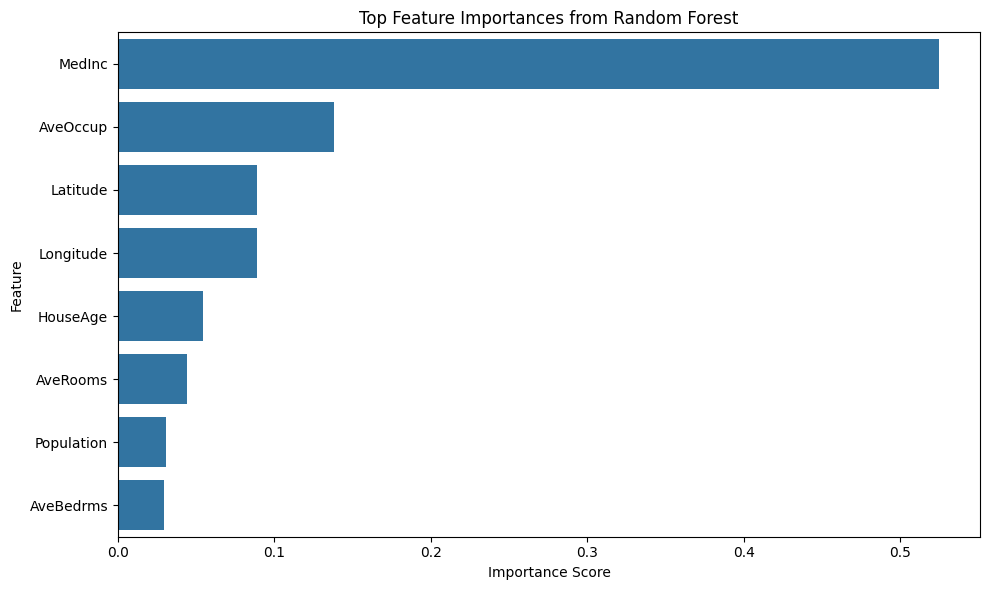

In [13]:
#9 Train a Random Forest Regressor and analyze feature importance scores
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# 1. Load Sample Dataset
# -------------------------------
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# -------------------------------
# 2. Split the Dataset
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 3. Train Random Forest Regressor
# -------------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# -------------------------------
# 4. Evaluate Model
# -------------------------------
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# -------------------------------
# 5. Feature Importance Analysis
# -------------------------------
importances = rf.feature_importances_
feature_names = X.columns

# Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nTop Features:")
print(feature_importance_df.head())

# -------------------------------
# 6. Plot Feature Importances
# -------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target




📊 Model Comparison Results:

                     Model  R² Score     RMSE
0        Bagging Regressor  0.804699  0.50589
1  Random Forest Regressor  0.805123  0.50534


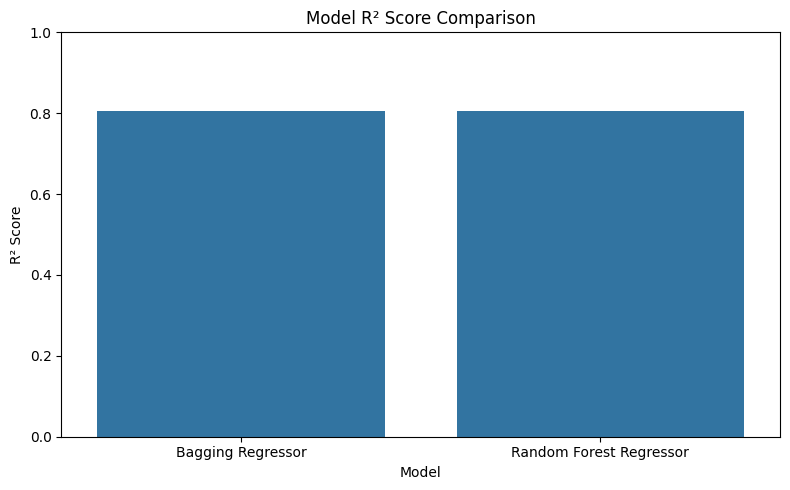

In [12]:
#10 Train an ensemble model using both Bagging and Random Forest and compare accuracy.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------------------
# 1. Load and Prepare the Dataset
# --------------------------------------
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------
# 2. Train Bagging Regressor (with estimator=)
# --------------------------------------
bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

# --------------------------------------
# 3. Train Random Forest Regressor
# --------------------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --------------------------------------
# 4. Evaluate Both Models
# --------------------------------------
r2_bag = r2_score(y_test, y_pred_bag)
rmse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# --------------------------------------
# 5. Compare Results
# --------------------------------------
results = pd.DataFrame({
    'Model': ['Bagging Regressor', 'Random Forest Regressor'],
    'R² Score': [r2_bag, r2_rf],
    'RMSE': [rmse_bag, rmse_rf]
})

print("\n📊 Model Comparison Results:\n")
print(results)

# --------------------------------------
# 6. Visual Comparison
# --------------------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R² Score', data=results)
plt.title('Model R² Score Comparison')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 72 candidates, totalling 360 fits
✅ Best Parameters:
 {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 50}

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

🎯 Accuracy Score: 0.9736842105263158


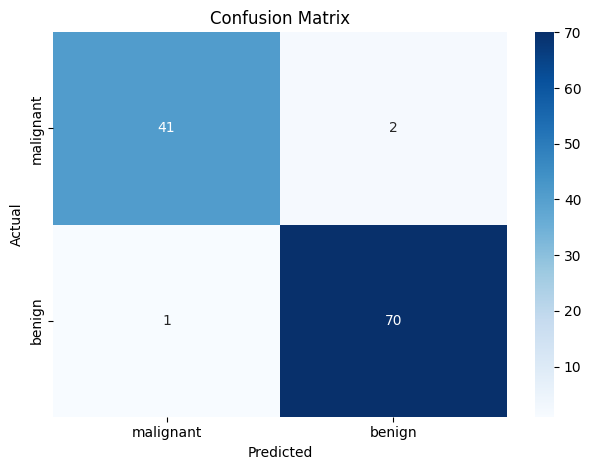

In [17]:
#11 Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------------
# 1. Load Dataset
# --------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# --------------------------------
# 2. Train/Test Split
# --------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------
# 3. Set up Random Forest + GridSearch
# --------------------------------
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# --------------------------------
# 4. Fit the Model
# --------------------------------
grid_search.fit(X_train, y_train)

# --------------------------------
# 5. Best Model Results
# --------------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("✅ Best Parameters:\n", grid_search.best_params_)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🎯 Accuracy Score:", accuracy_score(y_test, y_pred))

# --------------------------------
# 6. Confusion Matrix
# --------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


n_estimators: 10 | R²: 0.7845 | RMSE: 0.5314
n_estimators: 20 | R²: 0.7983 | RMSE: 0.5141
n_estimators: 50 | R²: 0.8036 | RMSE: 0.5072
n_estimators: 100 | R²: 0.8047 | RMSE: 0.5059
n_estimators: 150 | R²: 0.8058 | RMSE: 0.5044
n_estimators: 200 | R²: 0.8061 | RMSE: 0.5041


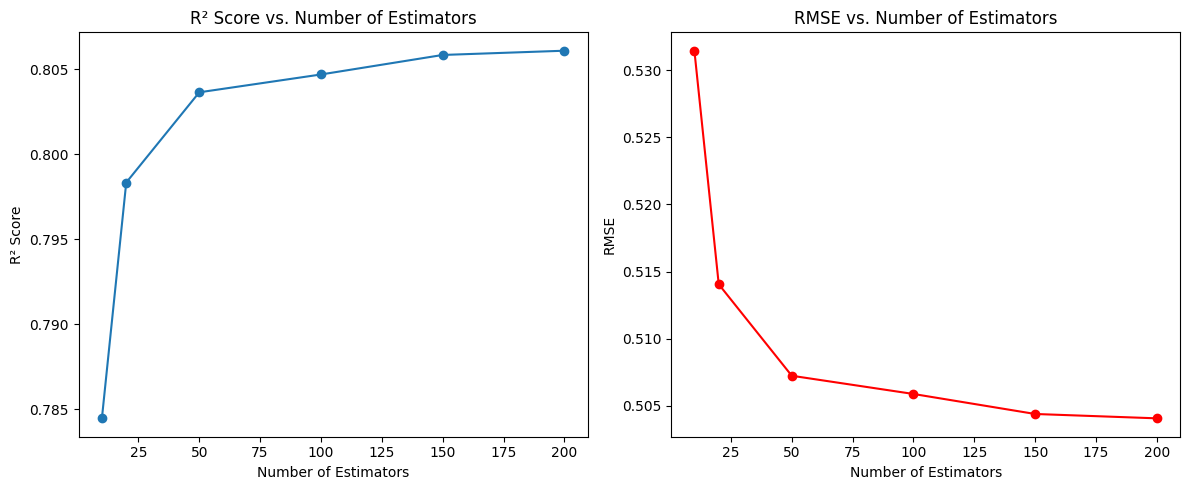

In [15]:
#12 Train a Bagging Regressor with different numbers of base estimators and compare performance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# -----------------------------
# 1. Load Dataset
# -----------------------------
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# -----------------------------
# 2. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 3. Test Different Estimator Counts
# -----------------------------
estimator_range = [10, 20, 50, 100, 150, 200]
results = []

for n in estimator_range:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({'n_estimators': n, 'R2': r2, 'RMSE': rmse})
    print(f"n_estimators: {n} | R²: {r2:.4f} | RMSE: {rmse:.4f}")

# -----------------------------
# 4. Convert Results to DataFrame
# -----------------------------
results_df = pd.DataFrame(results)

# -----------------------------
# 5. Plot Performance Metrics
# -----------------------------
plt.figure(figsize=(12, 5))

# R² Plot
plt.subplot(1, 2, 1)
plt.plot(results_df['n_estimators'], results_df['R2'], marker='o')
plt.title('R² Score vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')

# RMSE Plot
plt.subplot(1, 2, 2)
plt.plot(results_df['n_estimators'], results_df['RMSE'], marker='o', color='red')
plt.title('RMSE vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()


✅ Accuracy: 0.9649122807017544

📊 Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



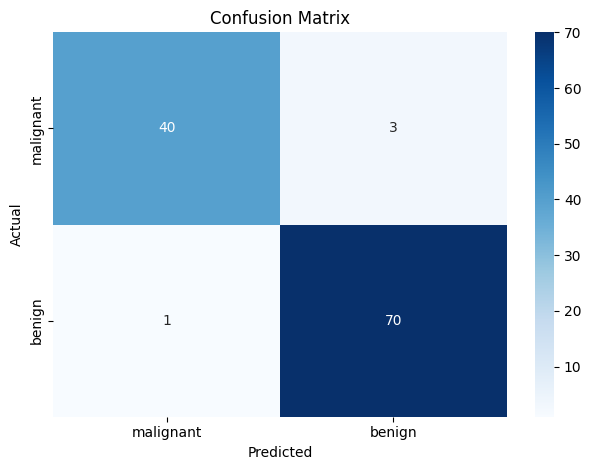


🔍 Total Misclassified Samples: 4

     Actual  Predicted
81        1          0
73        0          1
255       0          1
86        0          1

📌 Example Misclassified Sample Details:
                                81          73          255
mean radius               13.340000   13.800000   13.960000
mean texture              15.860000   15.790000   17.050000
mean perimeter            86.490000   90.430000   91.430000
mean area                520.000000  584.100000  602.400000
mean smoothness            0.107800    0.100700    0.109600
mean compactness           0.153500    0.128000    0.127900
mean concavity             0.116900    0.077890    0.097890
mean concave points        0.069870    0.050690    0.052460
mean symmetry              0.194200    0.166200    0.190800
mean fractal dimension     0.069020    0.065660    0.061300
radius error               0.286000    0.278700    0.425000
texture error              1.016000    0.620500    0.809800
perimeter error            1.

In [16]:
#13 Train a Random Forest Classifier and analyze misclassified samples
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ---------------------------------------
# 1. Load Dataset
# ---------------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
target_names = data.target_names

# ---------------------------------------
# 2. Split the Data
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------
# 3. Train Random Forest Classifier
# ---------------------------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# ---------------------------------------
# 4. Evaluate Model
# ---------------------------------------
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

# ---------------------------------------
# 5. Confusion Matrix
# ---------------------------------------
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ---------------------------------------
# 6. Analyze Misclassified Samples
# ---------------------------------------
misclassified_mask = y_test != y_pred
misclassified = X_test[misclassified_mask].copy()
misclassified['Actual'] = y_test[misclassified_mask]
misclassified['Predicted'] = y_pred[misclassified_mask]

print(f"\n🔍 Total Misclassified Samples: {len(misclassified)}\n")
print(misclassified[['Actual', 'Predicted']].head())

# Optional: See feature values of first 3 misclassified samples
print("\n📌 Example Misclassified Sample Details:")
print(misclassified.head(3).T)


In [19]:
#14 Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Train a Bagging Classifier with Decision Trees
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)

# Evaluate both
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

print("=== Bagging Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))




=== Decision Tree ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

=== Bagging Classifier ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



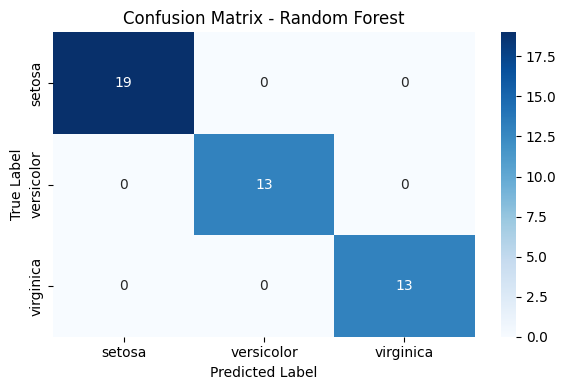

In [20]:
#15 Train a Random Forest Classifier and visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [21]:
#16 Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Define stacking classifier with Logistic Regression as final estimator
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=False
)

# Train individual models
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
svm = SVC(probability=True, random_state=42).fit(X_train, y_train)
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Train stacking model
stacking_clf.fit(X_train, y_train)

# Predict and compare accuracies
y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_stack = stacking_clf.predict(X_test)

print("Accuracy Comparison:")
print(f"Decision Tree:      {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"SVM:                {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Logistic Regression:{accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Stacking Classifier:{accuracy_score(y_test, y_pred_stack):.4f}")


Accuracy Comparison:
Decision Tree:      1.0000
SVM:                1.0000
Logistic Regression:1.0000
Stacking Classifier:1.0000


In [22]:
#17 Train a Random Forest Classifier and print the top 5 most important features
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 5 features
print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))


Top 5 Most Important Features:
             Feature  Importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


In [23]:
#18 Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load dataset
data = load_iris()
X, y = data.data, data.target
class_names = data.target_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Bagging Classifier using Decision Trees
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Predict
y_pred = bagging_model.predict(X_test)

# Evaluate using precision, recall, and F1-score
print("=== Bagging Classifier Performance ===")
print(classification_report(y_test, y_pred, target_names=class_names))


=== Bagging Classifier Performance ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



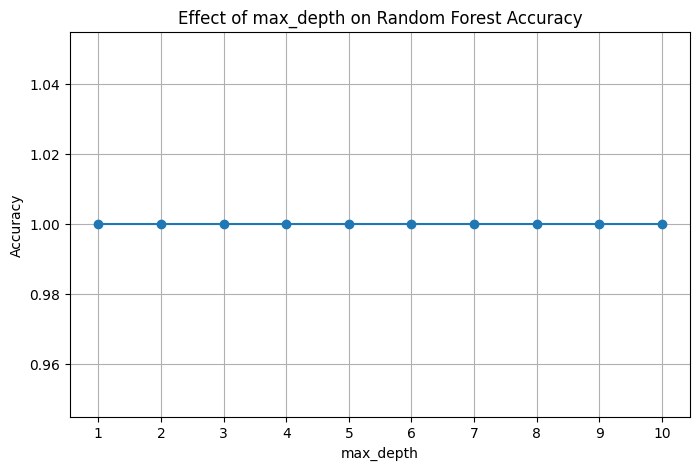

In [24]:
#19 Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test various max_depth values
depths = list(range(1, 11))
accuracies = []

for depth in depths:
    model = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Random Forest Accuracy')
plt.grid(True)
plt.xticks(depths)
plt.show()


In [26]:
#20 Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load regression dataset
X, y = load_diabetes(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define base estimators
dt = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor()

# Define bagging regressors
bagging_dt = BaggingRegressor(estimator=dt, n_estimators=100, random_state=42)
bagging_knn = BaggingRegressor(estimator=knn, n_estimators=100, random_state=42)

# Fit models
bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)

# Predict
y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)

# Evaluate
print("=== Bagging with Decision Tree Regressor ===")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_dt):.2f}")

print("\n=== Bagging with KNeighbors Regressor ===")
print(f"MSE: {mean_squared_error(y_test, y_pred_knn):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_knn):.2f}")


=== Bagging with Decision Tree Regressor ===
MSE: 2908.81
R² Score: 0.46

=== Bagging with KNeighbors Regressor ===
MSE: 3188.74
R² Score: 0.41


ROC-AUC Score: 0.9143


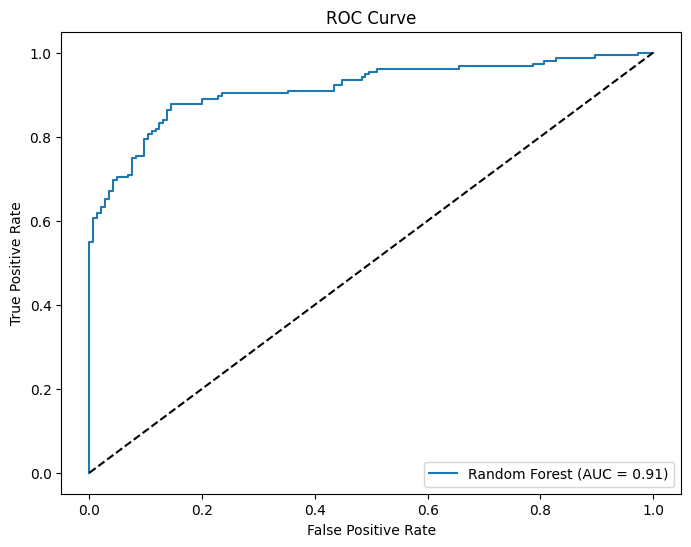

In [27]:
#21 Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# 1. Generate synthetic data (replace this with your actual data)
X, y = make_classification(n_samples=1000, n_features=20,
                           n_classes=2, random_state=42)

# 2. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100,
                           max_depth=5,
                           random_state=42)
rf.fit(X_train, y_train)

# 4. Predict probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# 5. Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# 6. (Optional) Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
#22 Train a Bagging Classifier and evaluate its performance using cross-validation.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import make_classification
import numpy as np

# 1. Generate synthetic data (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=20,
                          n_classes=2, random_state=42)

# 2. Initialize base estimator and bagging classifier
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)
bagging_clf = BaggingClassifier(
    estimator=base_estimator,  # Changed from base_estimator to estimator
    n_estimators=50,  # Number of base estimators
    max_samples=0.8,   # Percentage of samples to draw for each base estimator
    max_features=0.8,  # Percentage of features to draw for each base estimator
    random_state=42,
    n_jobs=-1         # Use all available cores
)

# 3. Set up stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. Perform cross-validation
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results = {}
for metric_name, metric in scoring_metrics.items():
    scores = cross_val_score(bagging_clf, X, y, cv=cv, scoring=metric)
    cv_results[metric_name] = scores
    print(f"{metric_name}: {np.mean(scores):.4f} (±{np.std(scores):.4f})")

# 5. (Optional) Feature importance
bagging_clf.fit(X, y)

if hasattr(base_estimator, 'feature_importances_'):
    importances = np.mean([est.feature_importances_ for est in bagging_clf.estimators_], axis=0)
    print("\nFeature importances:")
    for idx, imp in enumerate(importances):
        print(f"Feature {idx}: {imp:.4f}")

accuracy: 0.8740 (±0.0196)
precision: 0.8826 (±0.0248)
recall: 0.8640 (±0.0388)
f1: 0.8725 (±0.0215)
roc_auc: 0.9393 (±0.0220)


<Figure size 800x600 with 0 Axes>

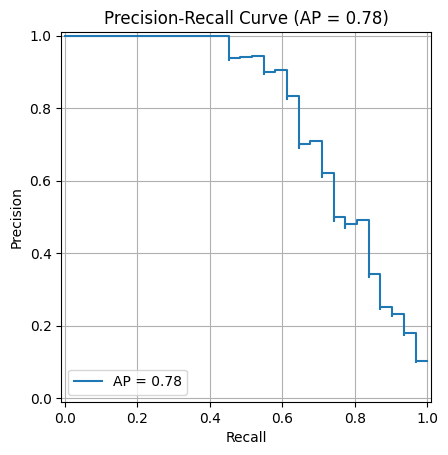

Average Precision: 0.7765
Baseline (Positive class ratio): 0.1033


In [30]:
#23 Train a Random Forest Classifier and plot the Precision-Recall curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

## 1. Generate or load your dataset (replace with your actual data)
# For demonstration, we'll create an imbalanced dataset (90:10 class ratio)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                          weights=[0.9, 0.1], random_state=42)

## 2. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

## 3. Initialize and train the Random Forest classifier
# Using class_weight='balanced' to handle imbalanced data
rf = RandomForestClassifier(n_estimators=100,
                          max_depth=5,
                          class_weight='balanced',
                          random_state=42)
rf.fit(X_train, y_train)

## 4. Get predicted probabilities for the positive class
y_scores = rf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

## 5. Calculate precision-recall curve metrics
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

## 6. Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
disp = PrecisionRecallDisplay(precision=precision, recall=recall,
                             average_precision=avg_precision)
disp.plot()
plt.title('Precision-Recall Curve (AP = {:.2f})'.format(avg_precision))
plt.grid(True)
plt.show()

## 7. (Optional) Print key metrics
print(f"Average Precision: {avg_precision:.4f}")
print(f"Baseline (Positive class ratio): {np.mean(y_test):.4f}")

Cross-validation accuracies (mean ± std):
Random Forest: 0.8929 (±0.0156)
Logistic Regression: 0.8700 (±0.0199)
Stacking Classifier: 0.8900 (±0.0167)

Test set accuracies:
Random Forest: 0.8500
Logistic Regression: 0.8500
Stacking Classifier: 0.8500


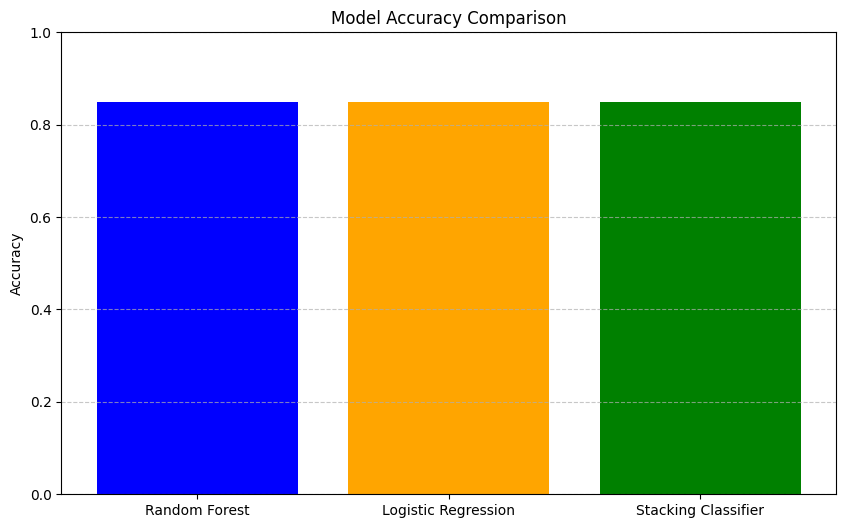

In [31]:
#24 Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# 1. Generate synthetic data (replace with your dataset)
X, y = make_classification(n_samples=1000, n_features=20,
                          n_classes=2, random_state=42)

# 2. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# 3. Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# 4. Define meta-learner (final estimator)
meta_learner = LogisticRegression(max_iter=1000, random_state=42)

# 5. Create Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_learner,
    cv=5,  # Number of cross-validation folds for stacking
    n_jobs=-1  # Use all available cores
)

# 6. Train individual models and stacking classifier
models = {
    'Random Forest': base_estimators[0][1],
    'Logistic Regression': base_estimators[1][1],
    'Stacking Classifier': stacking_clf
}

# 7. Evaluate models using cross-validation
print("Cross-validation accuracies (mean ± std):")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {np.mean(scores):.4f} (±{np.std(scores):.4f})")

# 8. Train on full training set and evaluate on test set
print("\nTest set accuracies:")
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name}: {acc:.4f}")

# 9. Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Sample size: 0.1 | Train MSE: 12765.3692 | Test MSE: 14238.5536 | Test R²: 0.6269
Sample size: 0.3 | Train MSE: 8014.9601 | Test MSE: 10991.1432 | Test R²: 0.7120
Sample size: 0.5 | Train MSE: 6930.4239 | Test MSE: 10425.5970 | Test R²: 0.7268
Sample size: 0.7 | Train MSE: 6274.1319 | Test MSE: 10035.3226 | Test R²: 0.7371
Sample size: 0.9 | Train MSE: 6064.7294 | Test MSE: 10564.3964 | Test R²: 0.7232
Sample size: 1.0 | Train MSE: 5996.3658 | Test MSE: 10776.3809 | Test R²: 0.7176


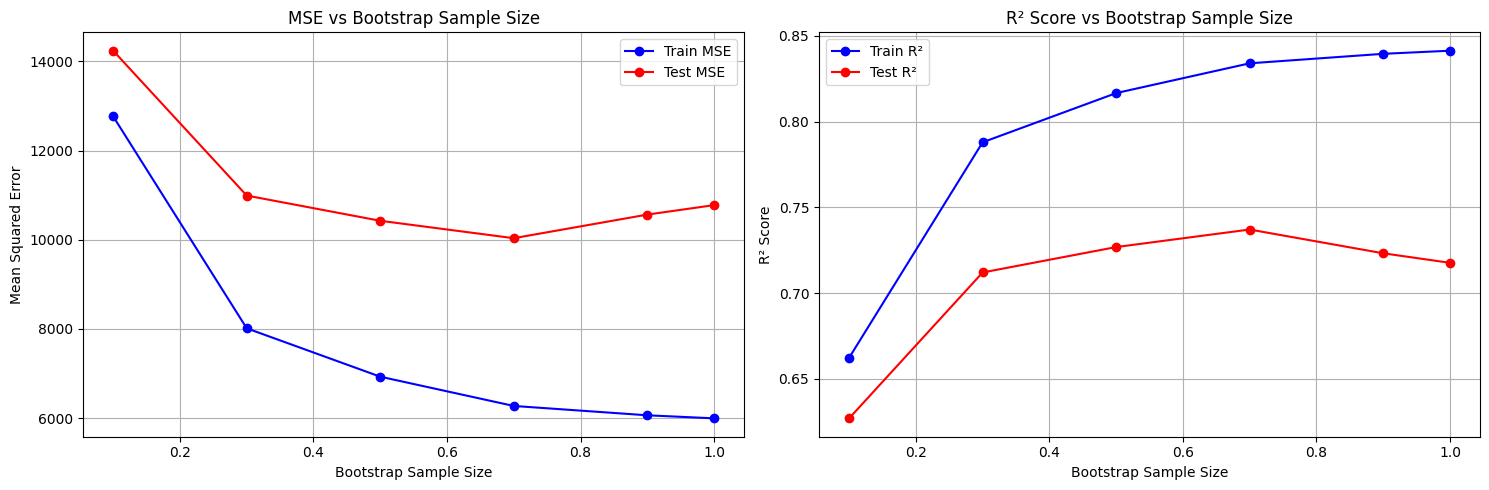


Optimal bootstrap sample size: 0.7 with Test MSE: 10035.3226


In [32]:
#25 Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 1. Generate synthetic regression data (replace with your dataset)
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

## 2. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Define different bootstrap sample sizes to test
bootstrap_sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # Fractions of the training set

## 4. Initialize storage for results
results = {
    'sample_size': [],
    'train_mse': [],
    'test_mse': [],
    'train_r2': [],
    'test_r2': []
}

## 5. Train and evaluate models with different sample sizes
for size in bootstrap_sizes:
    # Create Bagging Regressor with current sample size
    bagging = BaggingRegressor(
        estimator=DecisionTreeRegressor(max_depth=5),
        n_estimators=50,
        max_samples=size,  # Key parameter we're varying
        random_state=42,
        n_jobs=-1
    )

    # Train model
    bagging.fit(X_train, y_train)

    # Make predictions
    y_train_pred = bagging.predict(X_train)
    y_test_pred = bagging.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Store results
    results['sample_size'].append(size)
    results['train_mse'].append(train_mse)
    results['test_mse'].append(test_mse)
    results['train_r2'].append(train_r2)
    results['test_r2'].append(test_r2)

    print(f"Sample size: {size:.1f} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f} | Test R²: {test_r2:.4f}")

## 6. Plot the results
plt.figure(figsize=(15, 5))

# MSE Plot
plt.subplot(1, 2, 1)
plt.plot(results['sample_size'], results['train_mse'], 'b-o', label='Train MSE')
plt.plot(results['sample_size'], results['test_mse'], 'r-o', label='Test MSE')
plt.xlabel('Bootstrap Sample Size')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Bootstrap Sample Size')
plt.legend()
plt.grid(True)

# R² Plot
plt.subplot(1, 2, 2)
plt.plot(results['sample_size'], results['train_r2'], 'b-o', label='Train R²')
plt.plot(results['sample_size'], results['test_r2'], 'r-o', label='Test R²')
plt.xlabel('Bootstrap Sample Size')
plt.ylabel('R² Score')
plt.title('R² Score vs Bootstrap Sample Size')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 7. Find optimal sample size
optimal_idx = np.argmin(results['test_mse'])
optimal_size = results['sample_size'][optimal_idx]
print(f"\nOptimal bootstrap sample size: {optimal_size:.1f} with Test MSE: {results['test_mse'][optimal_idx]:.4f}")
